In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w
import explore as e
from scipy import stats
from importlib import reload
import warnings
from sklearn.preprocessing import RobustScaler, MinMaxScaler
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [52]:
reload(w)
df = w.wrangle_coasters()
train, validate, test = w.tvt_split(df,stratify='track_material')

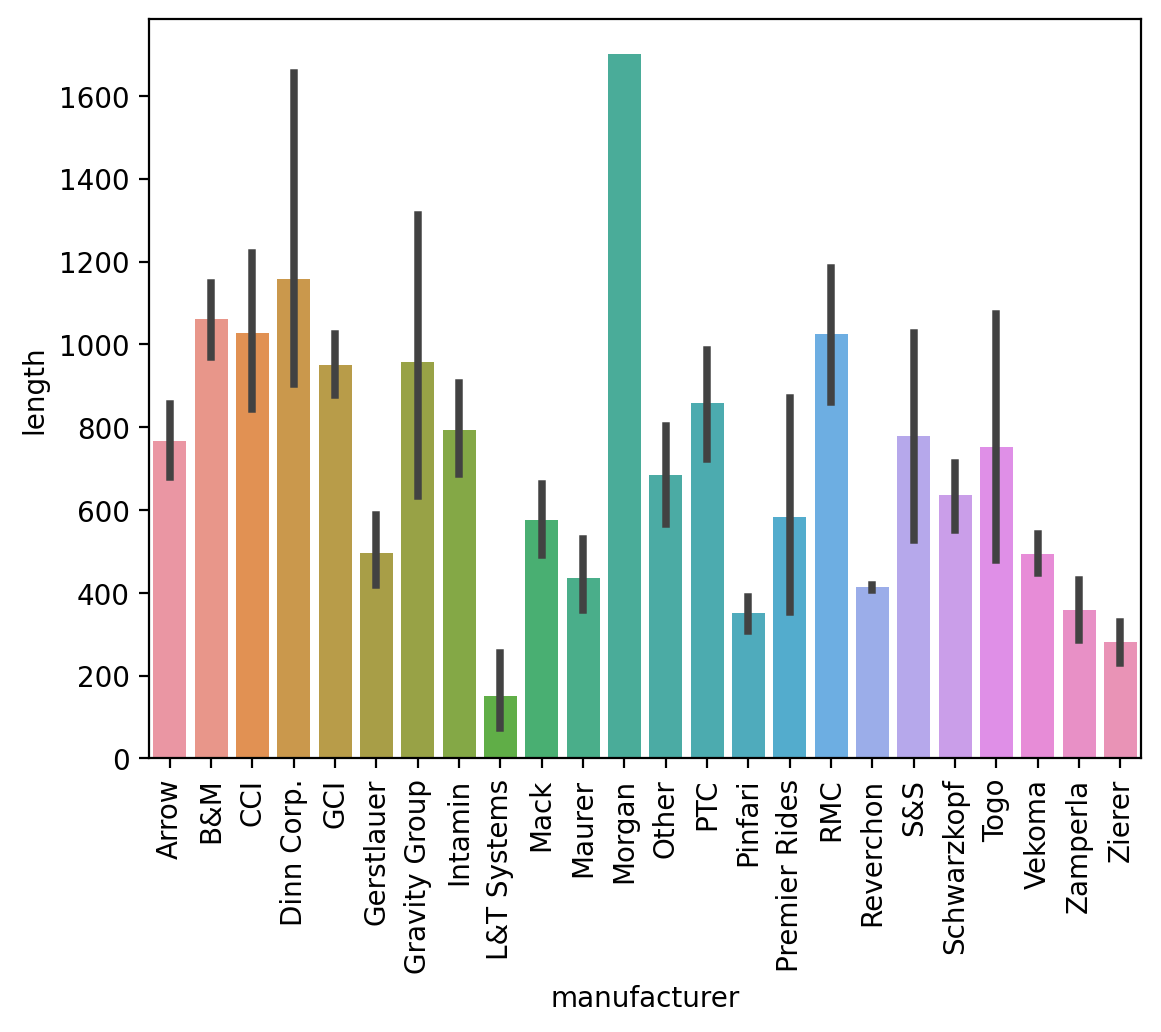

In [53]:
sns.barplot(data=train,x='manufacturer',y='length')
plt.xticks(rotation=90)
plt.show()

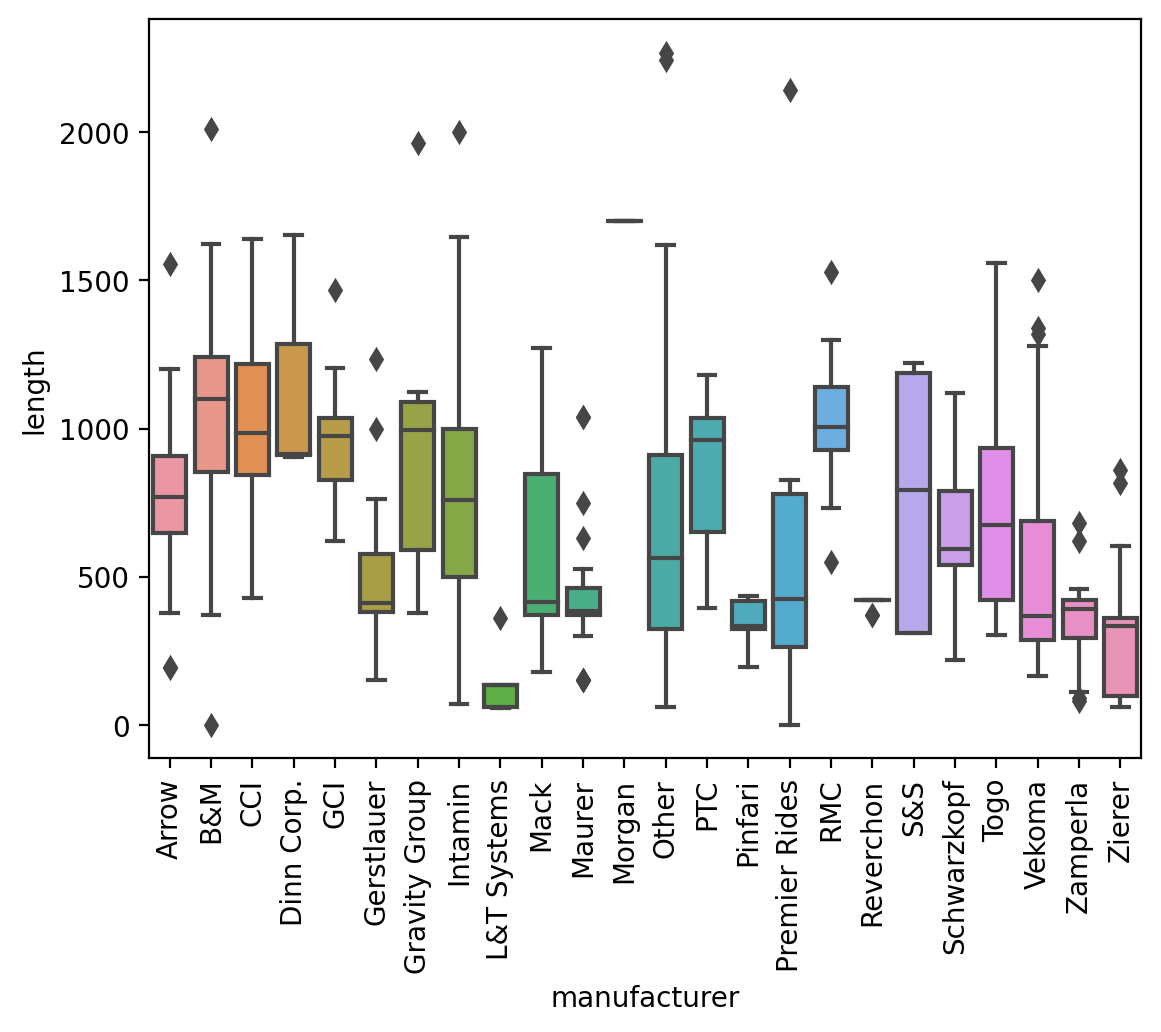

In [49]:
sns.boxplot(data=train,x='manufacturer',y='length')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='track_material', ylabel='length'>

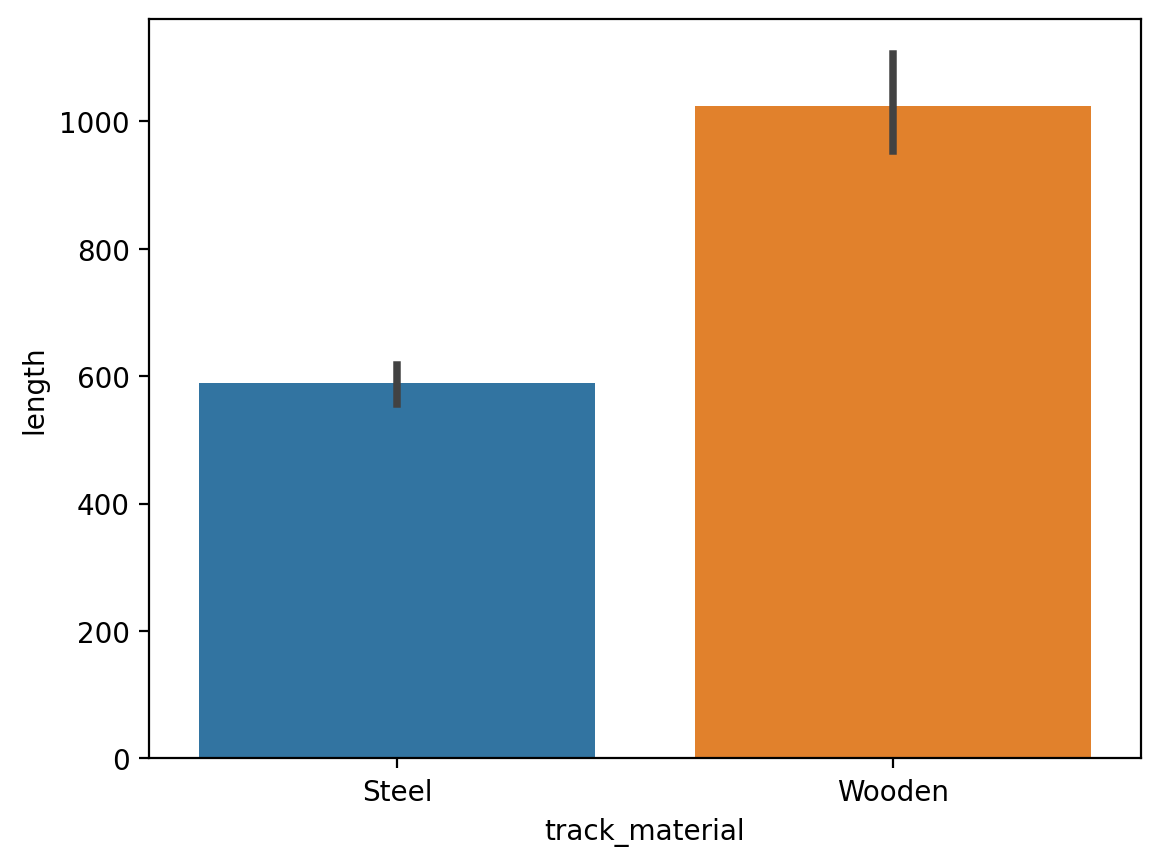

In [54]:
sns.barplot(data=train,x='track_material',y='length')

### Is there a positive relationship between material type and length?
#### $H_0$: $\mu_{steel} \geq \mu_{wood} \geq \mu_{hybrid}$
#### $H_a$: $\mu_{steel} < \mu_{wood} < \mu_{hybrid}$

### Assumptions:
1. sets are independent
2. sets are normally distributed

<AxesSubplot: xlabel='length', ylabel='Count'>

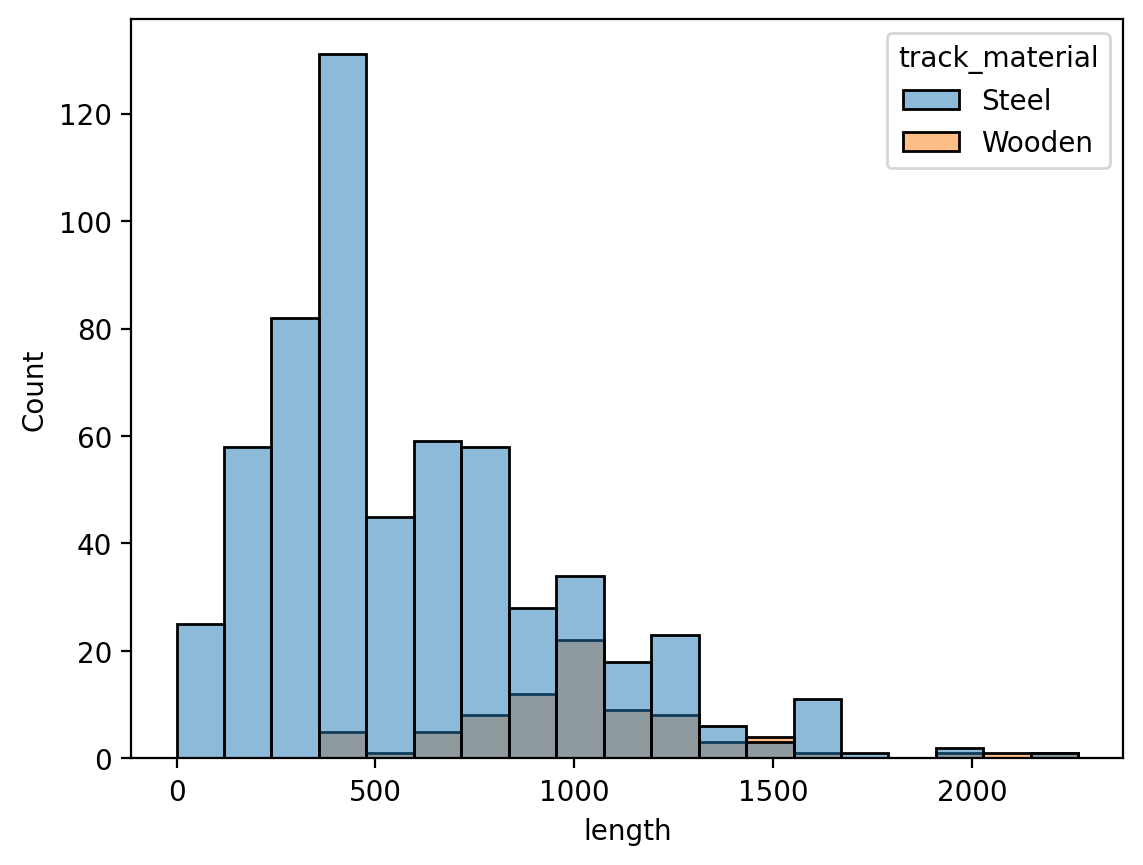

In [55]:
sns.histplot(data=train,x='length',hue='track_material')

In [57]:
steel = train[train.track_material == 'Steel']
wood = train[train.track_material == 'Wooden']
steel.length.var(), wood.length.var()

(136773.08146350074, 116933.6)

In [58]:
stats.levene(steel.length,wood.length)

LeveneResult(statistic=3.020970724957921, pvalue=0.08265783366437583)

In [59]:
t,p = stats.ttest_ind(steel.length, wood.length, equal_var=False)
e.t_to_md_1samp(p,t)

## t = -10.639135455562494 

 ## p/2 = 8.502824587830711e-19 

## Because t < 0 and $\alpha$ > p/2, we failed to   reject $H_0$

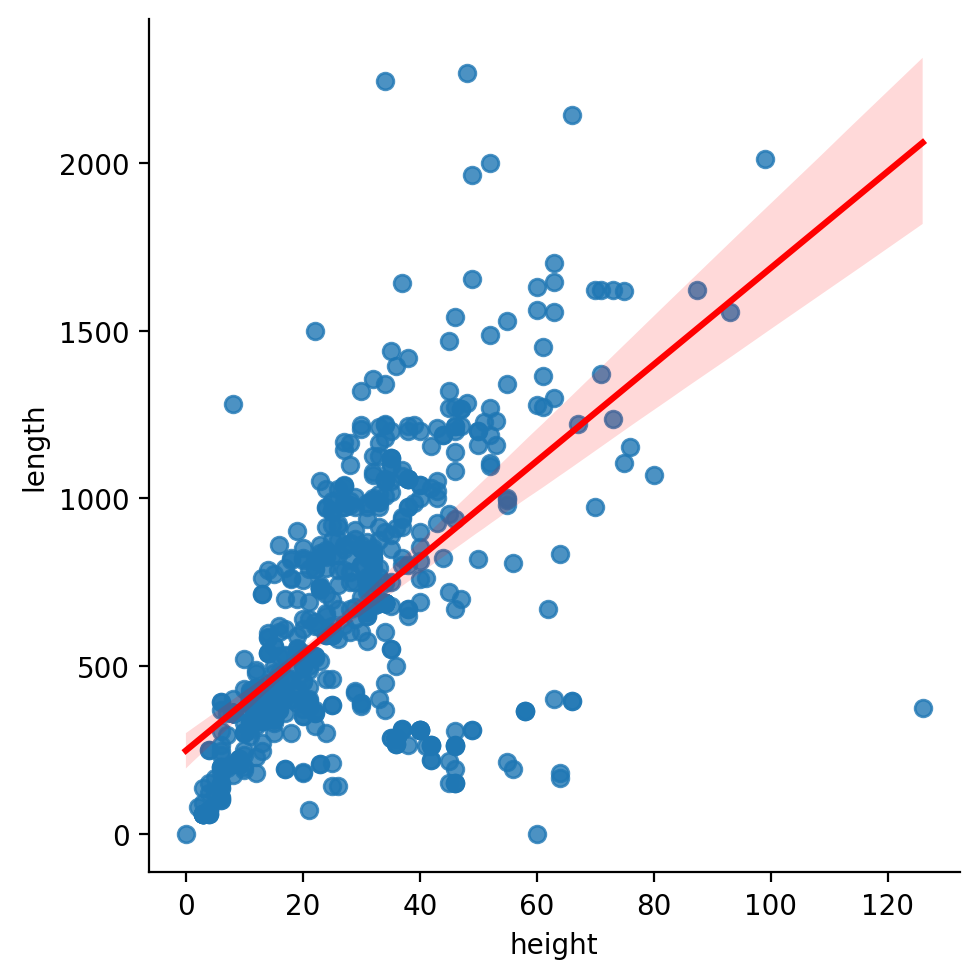

In [60]:
sns.lmplot(data=train,x='height',y='length',line_kws={'color':'red'})

In [39]:
train.columns

Index(['name', 'material_type', 'seating_type', 'speed', 'height', 'length',
       'num_inversions', 'manufacturer', 'park', 'status'],
      dtype='object')

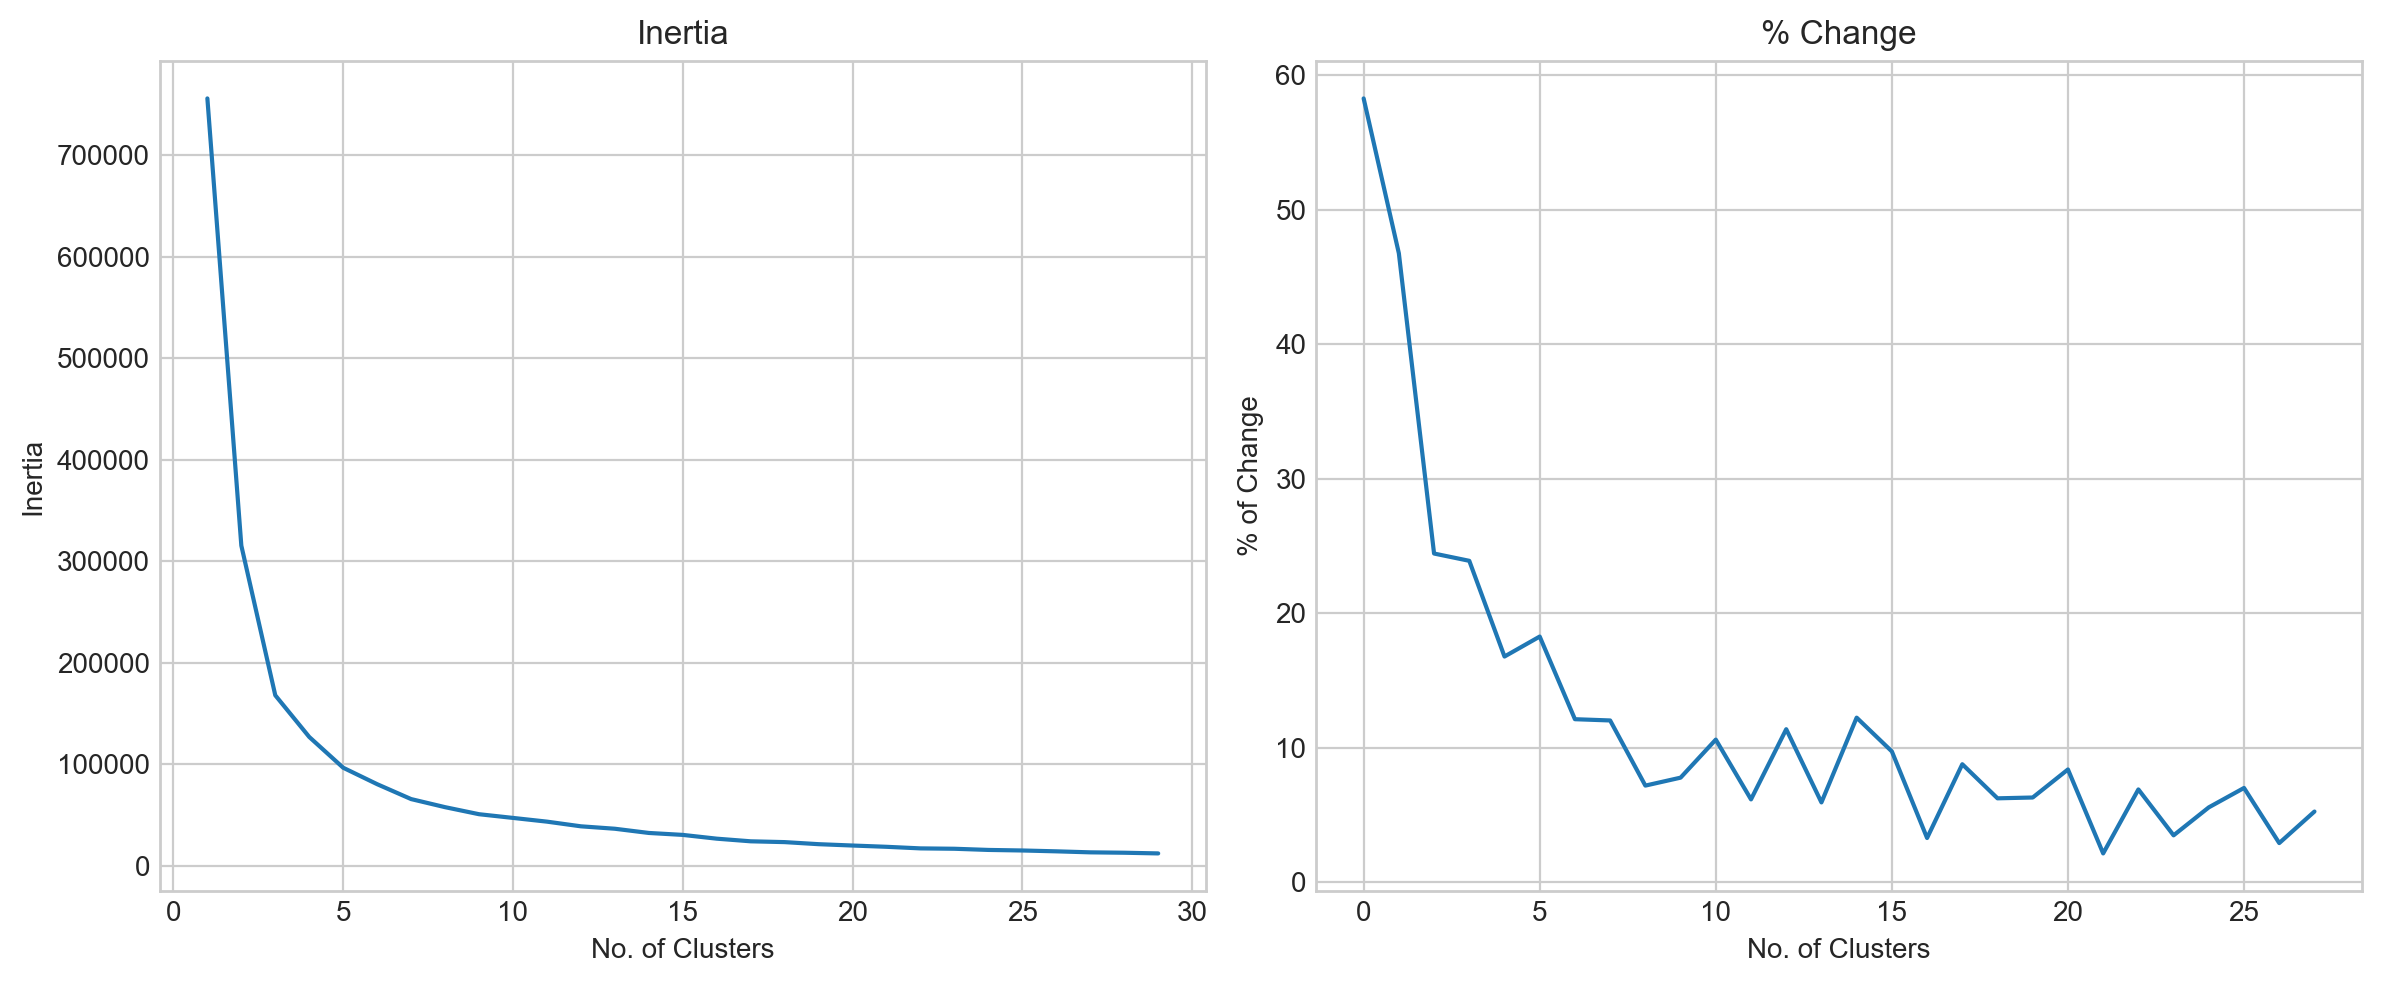

In [40]:
e.generate_elbow(train[['height','speed','num_inversions']])

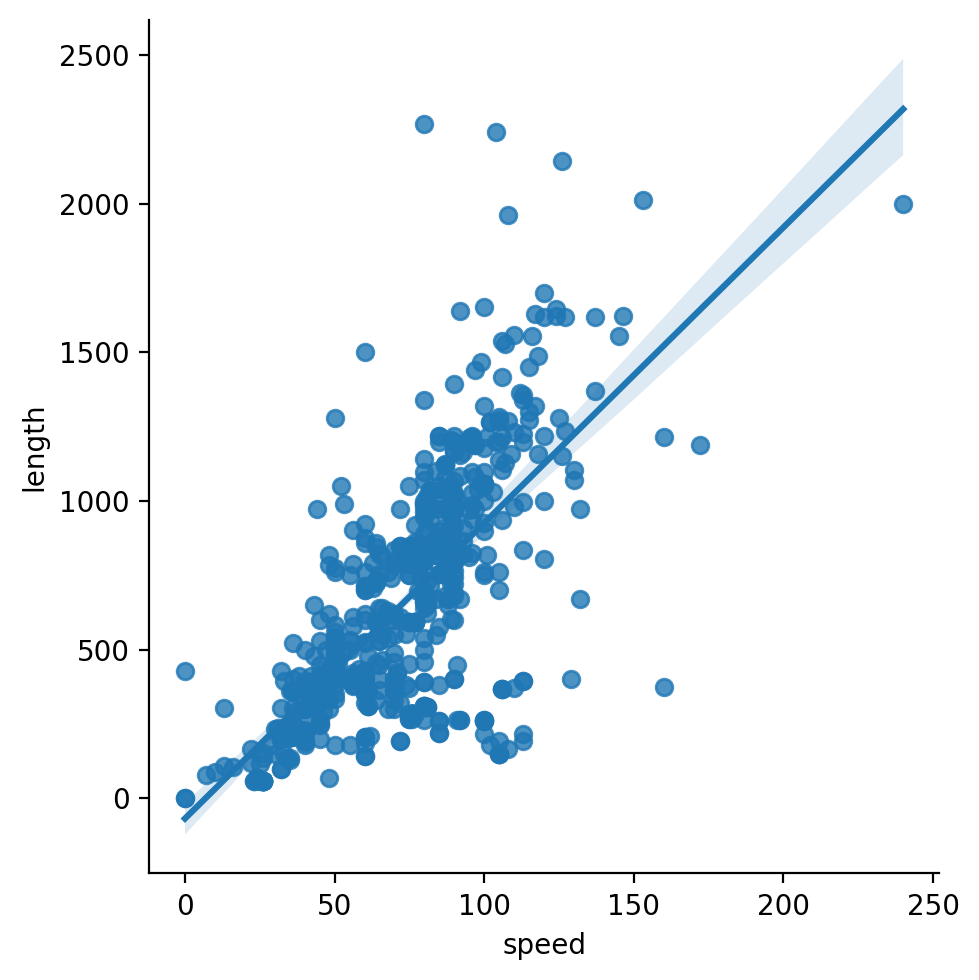

In [62]:
sns.lmplot(data=train,x='speed',y='length')

In [51]:
df[df.track_material == 'Hybrid']

,name,track_material,seating_type,speed,height,length,num_inversions,manufacturer,park,status
